# Оценка метрик качества базовой модели

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import set_config

set_config(display='diagram')

In [10]:
from titanic.data.make_dataset import load_titanic
from titanic.data.validation import train_test_split
from titanic.models.train import make_baseline_model

titanic = load_titanic()
train, test = train_test_split(titanic)
y_train = train['Survived']
y_test = test['Survived']

baseline_clf = make_baseline_model()
baseline_clf

Pipeline(steps=[('column_orderer', ColumnOrderer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('Embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Embarked']),
                                                 ('Onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass'])])),
                ('classifier', LogisticRegression())])

## Обучение модели

In [11]:
%%time
baseline_clf.fit(train, y_train);

CPU times: user 13.3 ms, sys: 502 µs, total: 13.8 ms
Wall time: 12.2 ms


Pipeline(steps=[('column_orderer', ColumnOrderer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('Embarked',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Embarked']),
                                                 ('Onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass'])])),
                ('classifier', LogisticRegression())])

## Оценка метрик

/media/volume_ssd/prog/python/FreeProjects/project-otus_mlops/otus-ml-skel/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


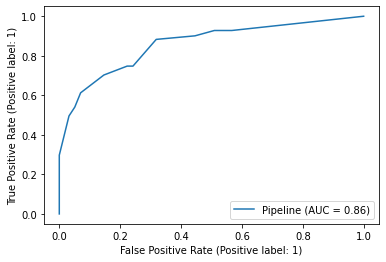

In [12]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(baseline_clf, test, y_test);

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, baseline_clf.predict(test))

0.7624089057210076

In [14]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://localhost:8081")

with mlflow.start_run(run_name="baseline-test") as run:
    sk_learn_rfr = baseline_clf

    # Log parameters and metrics using the MLflow APIs
    mlflow.log_metrics({"roc_auc": roc_auc_score(y_test, baseline_clf.predict(test))})

    # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=sk_learn_rfr,
#         artifact_path="baseline",
#         registered_model_name="baseline-reg-model"
#     )

KeyboardInterrupt: 